In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_excel("temp.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,18
1,18
2,18
3,18
4,18
...,...
996,29
997,29
998,29
999,29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sensor Value  1001 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [4]:
Days = pd.date_range(start="2017-09-07",end="2020-06-25")
Days

DatetimeIndex(['2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
               '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15', '2017-09-16',
               ...
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25'],
              dtype='datetime64[ns]', length=1023, freq='D')

In [5]:
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe


,ds,y
0,2017-09-07,18.0
1,2017-09-08,18.0
2,2017-09-09,18.0
3,2017-09-10,18.0
4,2017-09-11,18.0
...,...,...
1018,2020-06-21,NaN
1019,2020-06-22,NaN
1020,2020-06-23,NaN
1021,2020-06-24,NaN


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1023 non-null   object 
 1   y       1001 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.1+ KB


In [7]:
dataframe['y'] =  dataframe['y'].fillna(value=dataframe['y'].mean())

In [8]:
dataframe

,ds,y
0,2017-09-07,18.000000
1,2017-09-08,18.000000
2,2017-09-09,18.000000
3,2017-09-10,18.000000
4,2017-09-11,18.000000
...,...,...
1018,2020-06-21,21.261738
1019,2020-06-22,21.261738
1020,2020-06-23,21.261738
1021,2020-06-24,21.261738


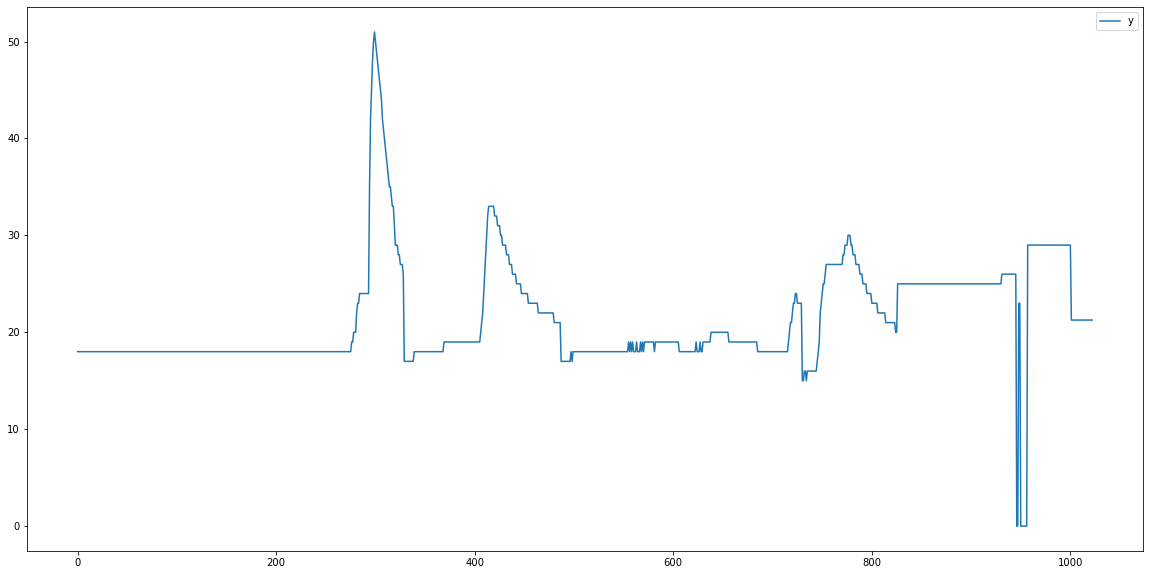

In [9]:
dataframe.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
def addfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','# Lags Used','# Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if(result[1]<= 0.05):
        print("Data is stationary")
    else:
        print("Data is non stationary")

In [11]:
addfuller_test(dataframe['y'])

ADF Test Statistic : -5.199693486919193
p-value : 8.804760720030307e-06
# Lags Used : 0
# Observations Used : 1022
Data is stationary


In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

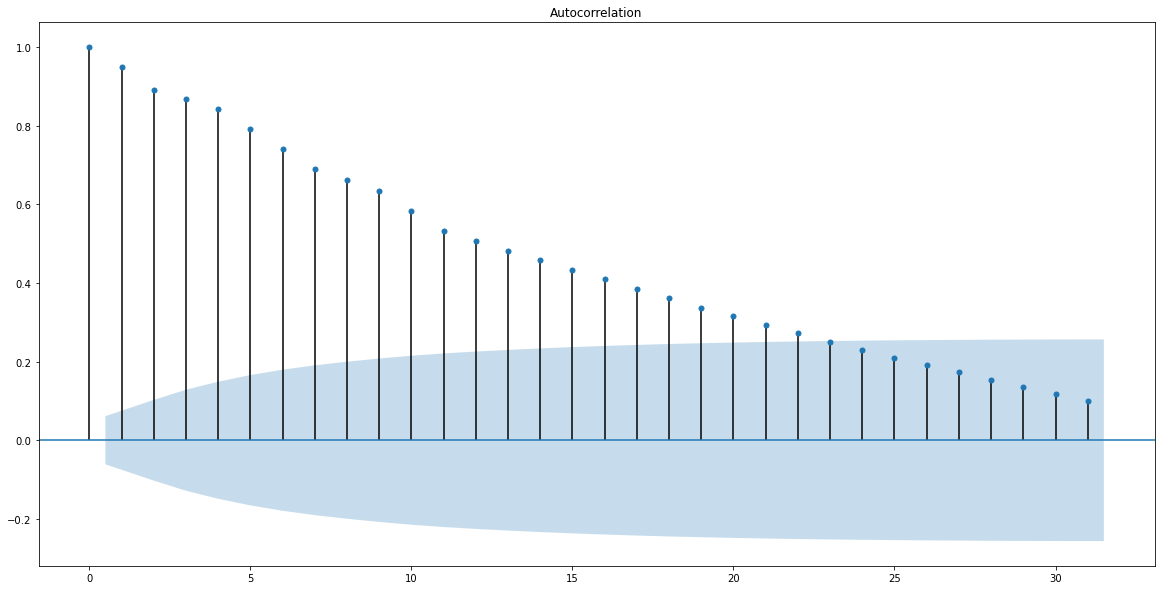

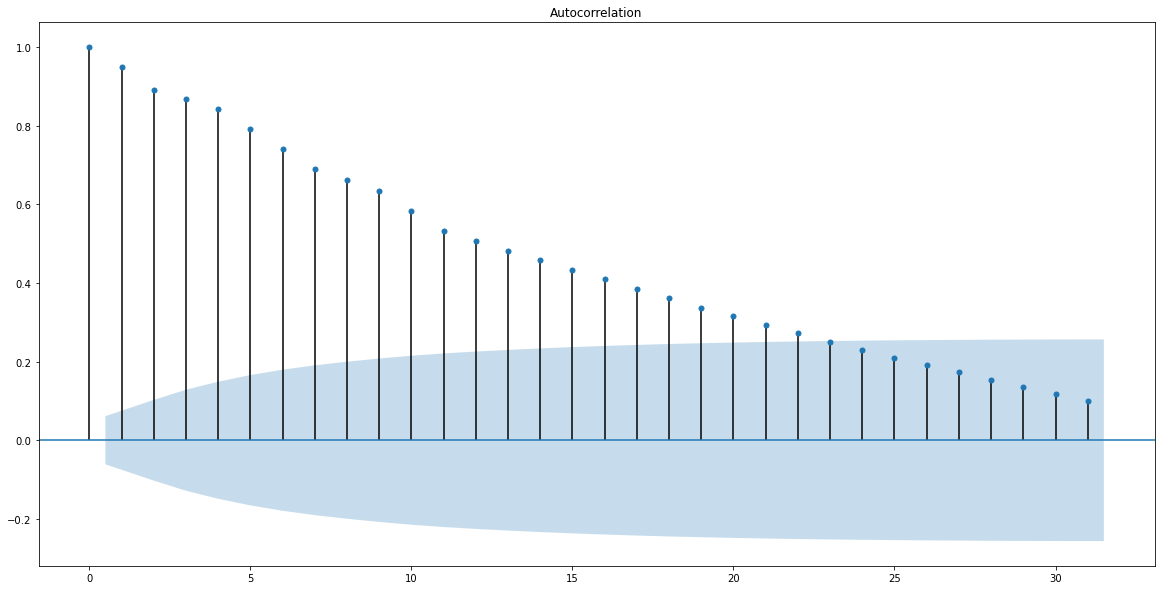

In [13]:
plot_acf(dataframe['y'])

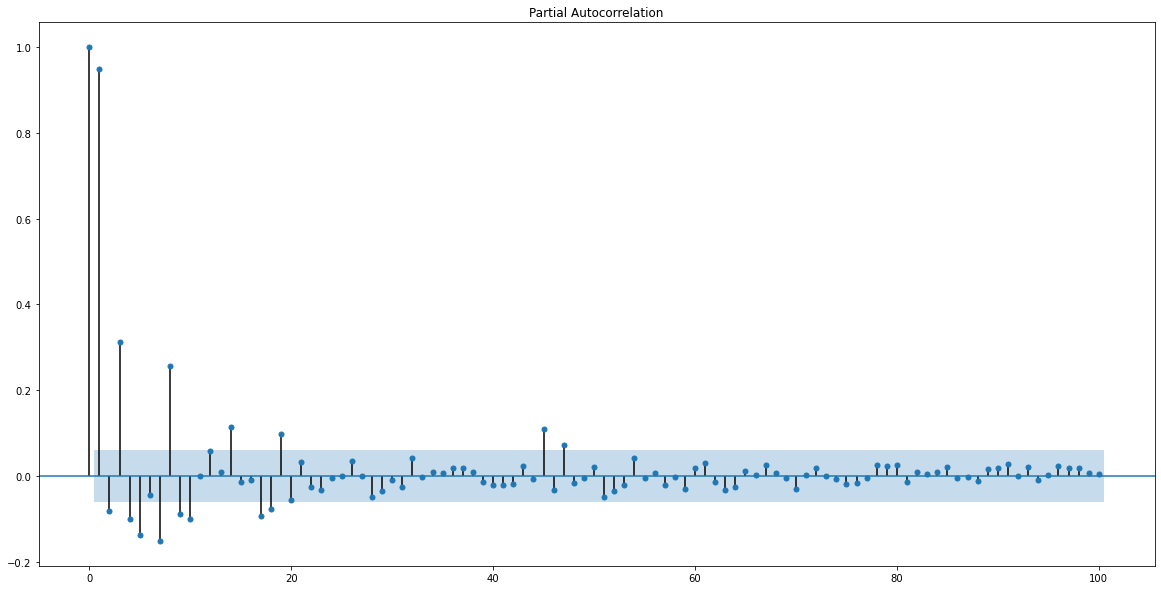

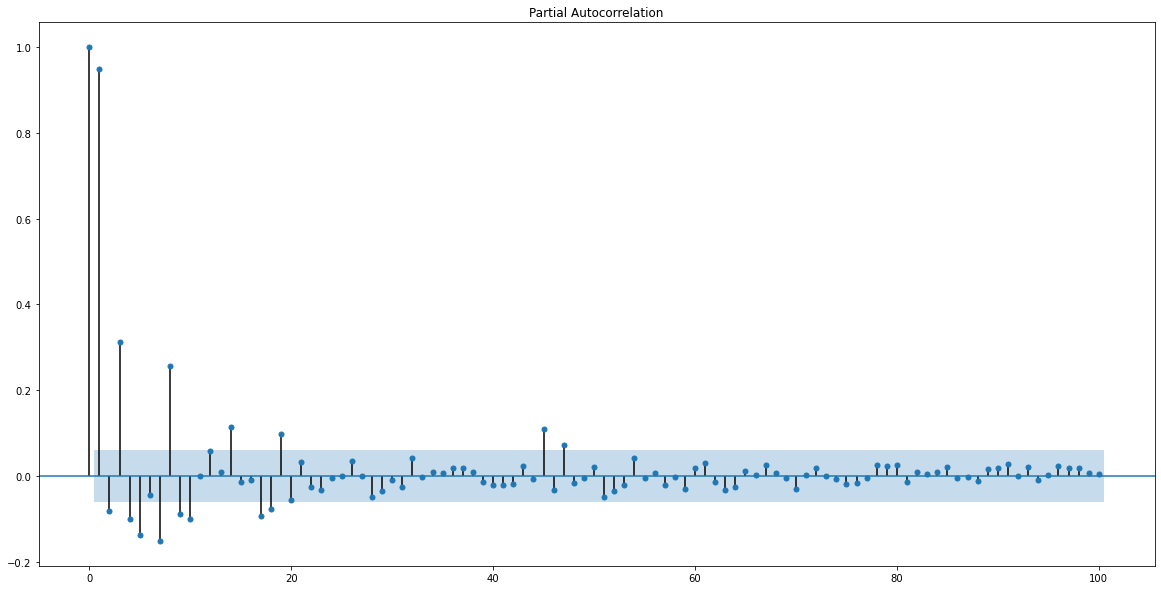

In [14]:
plot_pacf (dataframe['y'],lags=100)

In [15]:
import statsmodels.api as sm 
X = dataframe['y'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

model = sm.tsa.statespace.SARIMAX(history,order=(25,0,20),seasonal_order=(0,0,0,0))
try:
    model_fit = model.fit()
except:
    model_fit = model.fit()

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  675
Model:             SARIMAX(25, 0, 20)   Log Likelihood                -680.219
Date:                Wed, 16 Dec 2020   AIC                           1452.437
Time:                        17:50:50   BIC                           1660.114
Sample:                             0   HQIC                          1532.851
                                - 675                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5912      0.405      3.928      0.000       0.797       2.385
ar.L2         -0.7867      0.671     -1.173      0.241      -2.101       0.528
ar.L3         -0.0229      0.542     -0.042      0.966      -1.085       1.039
ar.L4          0.3723      0.436      0.855      0.393      -0.481       1.226
ar.L5         -0.1034      0.387     -0.267      0.790      -0.863       0.656
ar.L6          0.1879      0.398      0.472      0.637      -0.593       0.969
ar.L7         -0.3533      0.340     -1.040      0.298      -1.019       0.313
ar.L8          0.2519      0.371      0.678      0.498      -0.476       0.980
ar.L9          0.1371      0.334      0.411      0.681      -0.517       0.791
ar.L10        -0.1482      0.352     -0.421      0.674      -0.838       0.541
ar.L11        -0.1894      0.315     -0.601      0.548      -0.807       0.428
ar.L12        -0.1450      0.320     -0.454      0.650      -0.772       0.482
ar.L13         0.4320      0.307      1.408      0.159      -0.169       1.033
ar.L14        -0.2176      0.404     -0.538      0.590      -1.010       0.575
ar.L15        -0.1613      0.353     -0.456      0.648      -0.854       0.531
ar.L16        -0.0327      0.311     -0.105      0.916      -0.642       0.576
ar.L17         0.2185      0.326      0.671      0.502      -0.420       0.857
ar.L18         0.2462      0.364      0.677      0.498      -0.467       0.959
ar.L19        -0.8546      0.294     -2.906      0.004      -1.431      -0.278
ar.L20         1.1390      0.446      2.552      0.011       0.264       2.014
ar.L21        -0.6433      0.430     -1.495      0.135      -1.487       0.200
ar.L22         0.0285      0.171      0.166      0.868      -0.307       0.364
ar.L23         0.0825      0.157      0.525      0.599      -0.225       0.390
ar.L24        -0.1634      0.149     -1.098      0.272      -0.455       0.128
ar.L25         0.1343      0.078      1.725      0.085      -0.018       0.287
ma.L1         -0.2828      0.403     -0.701      0.483      -1.074       0.508
ma.L2          0.2574      0.284      0.906      0.365      -0.299       0.814
ma.L3          0.3264      0.280      1.166      0.244      -0.222       0.875
ma.L4          0.0572      0.288      0.198      0.843      -0.508       0.622
ma.L5         -0.1079      0.250     -0.431      0.666      -0.598       0.382
ma.L6         -0.2247      0.238     -0.943      0.346      -0.692       0.242
ma.L7          0.0283      0.285      0.099      0.921      -0.531       0.587
ma.L8         -0.2227      0.234     -0.951      0.342      -0.682       0.236
ma.L9         -0.3751      0.245     -1.532      0.126      -0.855       0.105
ma.L10        -0.2534      0.352     -0.721      0.471      -0.942       0.435
ma.L11        -0.1028      0.323     -0.319      0.750      -0.735       0.530
ma.L12         0.1369      0.261      0.524      0.600      -0.375       0.649
ma.L13        -0.2007      0.233     -0.860      0.390      -0.658       0.257
ma

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error
preds = model_fit.forecast(steps=len(test))


In [18]:
preds = preds.tolist()
preds

[19.017508586155337,
 18.904464167011987,
 18.932863270761835,
 18.76632240106688,
 18.64715281116343,
 18.59152572238601,
 18.80645959277511,
 18.593239379899718,
 18.472186984906866,
 18.526547401808315,
 18.48006310607451,
 18.34342723411642,
 18.334056773669957,
 18.303932931846944,
 18.292914510093375,
 18.307669874495254,
 18.30421232757543,
 18.227614096430884,
 17.96384730934632,
 17.99514878328273,
 18.116406931577515,
 18.01150149048323,
 17.96298234345909,
 17.939521970585126,
 17.932190218644784,
 17.772568168823472,
 17.872269010807152,
 17.824911373344012,
 17.71544756022952,
 17.723551702109695,
 17.793917422647432,
 17.652675983601405,
 17.5972310700353,
 17.617142948019307,
 17.64486715836483,
 17.631198321969233,
 17.561632090016566,
 17.612082007566485,
 17.49063605876701,
 17.41380491903947,
 17.493303951073973,
 17.480425498443573,
 17.44106020975223,
 17.44068850907643,
 17.50668004625782,
 17.351446190271954,
 17.3308565273393,
 17.370020290058307,
 17.3615802663

In [19]:
test = test.tolist()
test

[19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 20.0,
 21.0,
 21.0,
 22.0,
 23.0,
 23.0,
 24.0,
 24.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 15.0,
 15.0,
 16.0,
 16.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 18.0,
 19.0,
 22.0,
 23.0,
 24.0,
 25.0,
 25.0,
 26.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 28.0,
 28.0,
 29.0,
 29.0,
 29.0,
 30.0,
 30.0,
 30.0,
 29.0,
 29.0,
 28.0,
 28.0,
 28.0,
 27.0,
 27.0,
 27.0,
 27.0,
 26.0,
 26.0,
 26.0,
 25.0,
 25.0,
 25.0,
 25.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 21.0,
 21.0,
 21.0,
 21.0,

In [20]:
mean_squared_error(test,preds)

103.0897029255137